**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

Welcome to my Inaugral Project 2024.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class and definitions](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

from types import SimpleNamespace

class ExchangeEconomyClass:
    def __init__(self):
        self.par = SimpleNamespace()
        # a. preferences
        self.par.alpha = 1/3
        self.par.beta = 2/3
        # b. endowments
        self.par.w1A = 0.8
        self.par.w2A = 0.3
        self.par.w1B = 1 - self.par.w1A
        self.par.w2B = 1 - self.par.w2A


    def utility_A(self, x1A, x2A):
        return (x1A ** self.par.alpha) * (x2A ** (1 - self.par.alpha))

    def utility_B(self, x1B, x2B):
        return (x1B ** self.par.beta) * (x2B ** (1 - self.par.beta))
    
    def demand_A(self,p1):
        if p1 < 0:
            raise ValueError("p1 must be greater than or equal to 0.")
        x1A = self.par.alpha * (p1 * self.par.w1A + self.par.w2A) / p1
        x2A = (1-self.par.alpha) * (p1 * self.par.w1A + self.par.w2A)
        return x1A, x2A

    def demand_B(self,p1):
        if p1 < 0:
            raise ValueError("p1 must be greater than or equal to 0.")
        x1B = self.par.beta * (p1 * self.par.w1B + self.par.w2B) / p1
        x2B = (1-self.par.beta) * (p1 * self.par.w1B + self.par.w2B)
        return x1B, x2B
    
    
    def find_pareto(model):
        pareto = []
        N = 75
        step = 1 / N
        for x1A in x1A_values:
            for x2A in x2A_values:
                # Calculate utilities for Agent A and B
                utility_A_current = model.utility_A(x1A, x2A)
                utility_B_current = model.utility_B(1 - x1A, 1 - x2A)
                # Check if it's a Pareto improvement
                if (utility_A_current >= model.utility_A(model.par.w1A, model.par.w2A) and
                        utility_B_current >= model.utility_B(model.par.w1B, model.par.w2B)):
                    pareto.append((x1A, x2A))
        return pareto
    
    def check_market_clearing(self,p1):

        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        eps1 = x1A-par.w1A + x1B-(1-par.w1A)
        eps2 = x2A-par.w2A + x2B-(1-par.w2A)

        return eps1,eps2
    

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

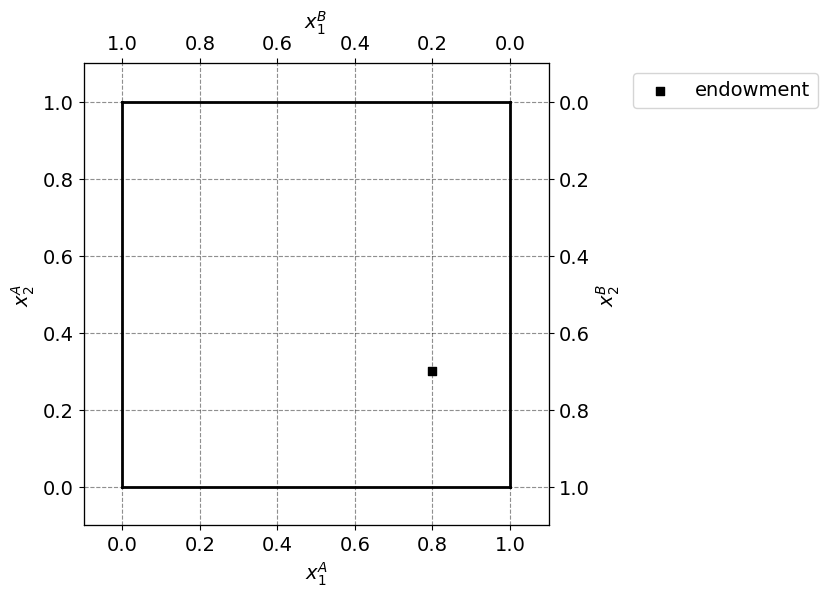

In [4]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## <a id='toc1_'></a>[Answer to the assignment](#toc0_)

### <a id='toc2_1_'></a>[Question 1](#toc0_)

In [5]:


    # Create an instance of the ExchangeEconomyClass
    walras = ExchangeEconomyClass()

    # Now calculating initial utility with endowments:
    utility_A_initial = walras.utility_A(walras.par.w1A, walras.par.w2A)
    utility_B_initial = walras.utility_B(walras.par.w1B, walras.par.w2B)

    # Print the initial utility
    print("Initial Utility for Agent A:", utility_A_initial)
    print("Initial Utility for Agent B:", utility_B_initial)    

    # Define N
    N = 75

    # Generate possible combinations of A's holding of the two goods:
    step = 1 / N
    x1A_values = [i * step for i in range(N + 1)]
    x2A_values = [i * step for i in range(N + 1)]

    print("Possible x1A values:", x1A_values)
    print("Possible x2A values:", x2A_values) 

    def find_pareto():
        pareto = [] #initialises an empty list
        for x1A in x1A_values:
            for x2A in x2A_values:
                # Calculate utilities for Agent A
                utility_A_current = walras.utility_A(x1A, x2A)
                utility_B_current = walras.utility_B(1 - x1A, 1 - x2A)

                # Check if it's a Pareto improvement
                if (utility_A_current >= walras.utility_A(walras.par.w1A, walras.par.w2A) and
                    utility_B_current >= walras.utility_B(walras.par.w1B, walras.par.w2B)):
                    pareto.append((x1A, x2A))

        return pareto

    # Call the function to find Pareto improvements
    improvements = find_pareto()

    # Print Pareto improvements
    print("Pareto Improvements:")
    for i, (x1A, x2A) in enumerate(improvements, 1):
        print(f"Improvement {i}: X_1 A: {x1A}, X_2 A: {x2A}")


Initial Utility for Agent A: 0.41601676461038084
Initial Utility for Agent B: 0.30365889718756617
Possible x1A values: [0.0, 0.013333333333333334, 0.02666666666666667, 0.04, 0.05333333333333334, 0.06666666666666667, 0.08, 0.09333333333333334, 0.10666666666666667, 0.12000000000000001, 0.13333333333333333, 0.14666666666666667, 0.16, 0.17333333333333334, 0.18666666666666668, 0.2, 0.21333333333333335, 0.22666666666666668, 0.24000000000000002, 0.25333333333333335, 0.26666666666666666, 0.28, 0.29333333333333333, 0.3066666666666667, 0.32, 0.33333333333333337, 0.3466666666666667, 0.36000000000000004, 0.37333333333333335, 0.3866666666666667, 0.4, 0.4133333333333334, 0.4266666666666667, 0.44, 0.45333333333333337, 0.4666666666666667, 0.48000000000000004, 0.49333333333333335, 0.5066666666666667, 0.52, 0.5333333333333333, 0.5466666666666667, 0.56, 0.5733333333333334, 0.5866666666666667, 0.6000000000000001, 0.6133333333333334, 0.6266666666666667, 0.64, 0.6533333333333333, 0.6666666666666667, 0.68, 0

There are 1587 possible combinations, which are Pareto improvements upon the initial endowments. This is now illustrated in an Edgeworth box:

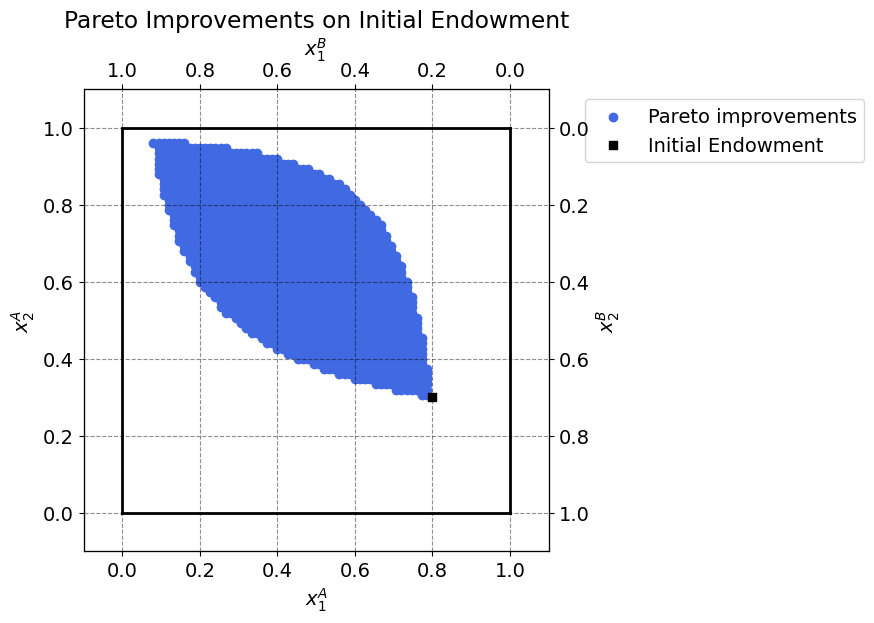

In [6]:
import matplotlib.pyplot as plt
from types import SimpleNamespace


# Create an instance of the ExchangeEconomyClass
walras = ExchangeEconomyClass()

# Generate possible combinations of A's holding of the two goods:
N = 75
step = 1 / N
x1A_values = [i * step for i in range(N + 1)]
x2A_values = [i * step for i in range(N + 1)]

# Call the function to find Pareto improvements
improvements = find_pareto()

# Set up the Edgeworth box plot
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()



# Plot Pareto improvements (unified)
for i, (x1A, x2A) in enumerate(improvements, 1):
    ax_A.scatter(x1A, x2A, marker='o', color='royalblue')

# Labels the improvement set
ax_A.scatter([], [], marker='o', color='royalblue', label='Pareto improvements')


# Plot initial endowment
ax_A.scatter(walras.par.w1A, walras.par.w2A, marker='s', color='black', label='Initial Endowment')

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.7,1.0));
    


# Plot limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

plt.title('Pareto Improvements on Initial Endowment')

plt.show()

Here we have all Pareto improvements illustrated in an Edgeworth Box.

### <a id='toc2_1_'></a>[Question 2](#toc0_)

In [7]:

import pandas as pd    

economy2 = ExchangeEconomyClass() 

# Define a range of p1 values
N = 75 

# Calculate the increment size
increment = 2 / N

# Generate the set of p1 values
p1_values = [0.5 + i * increment for i in range(N+1)]

# Include the upper bound (2.5) in the set
p1_values.append(2.5)


#Checks that all p1 values are consistent with the assignment
print(p1_values)




def find_market_errors(economy2, p1_values):
        errors = []
        for p1 in p1_values:
            eps1, eps2 = economy2.check_market_clearing(p1)
            errors.append((eps1, eps2))
        return errors


# Find market errors for each p1 value
market_errors = find_market_errors(economy2, p1_values)



# Convert the list of tuples (market_errors) into a DataFrame
df = pd.DataFrame(market_errors, columns=['Market Error 1', 'Market Error 2'])

pd.set_option('display.max_rows', 77)

# Display the DataFrame
print(df)

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666667, 1.1933333333333334, 1.2200000000000002, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333335, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7000000000000002, 1.7266666666666668, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333335, 1.86, 1.8866666666666667, 1.9133333333333333, 1.9400000000000002, 1.9666666666666668, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666

Here we have the market errors displayed for all 77 different prices.


### <a id='toc2_1_'></a>[Question 3](#toc0_)

As seen from the list above, none of the prices in the list clear either market. We know from economic theory that a price that clears one market will also clear the other.

In [8]:
import numpy as np

# Defines the range of p1 values for the search
lower_bound = 0.5
upper_bound = 5.0
num_values = 1000
step = (upper_bound - lower_bound) / num_values


# Initializes variables to store market clearing price and minimum error
market_clearing_price = None
min_error = float('inf')

# Iterates over all possible values and find the one with minimum error
for p1 in np.arange(lower_bound, upper_bound + step, step):
    eps1, eps2 = economy2.check_market_clearing(p1)
    total_error = abs(eps1) + abs(eps2)
    if total_error < min_error:
        min_error = total_error
        market_clearing_price = p1

# Prints the market clearing price
if market_clearing_price is not None:
    print(f"Market clearing price: {market_clearing_price}")
else:
    print("Market clearing price not found within the specified range.")



Market clearing price: 0.9454999999999949


The market clearing price is p1=0.95.

We can check this by running it through the error functions:

In [9]:
# Define the function to find market errors for a specific price
def find_market_errors_for_price(economy2, price):
    eps1, eps2 = economy2.check_market_clearing(price)
    return eps1, eps2

# Use the function to find errors for the market clearing price
market_clearing_eps1, market_clearing_eps2 = find_market_errors_for_price(economy2, market_clearing_price)

print("Errors at the market clearing price:")
print("Eps1:", market_clearing_eps1)
print("Eps2:", market_clearing_eps2)

Errors at the market clearing price:
Eps1: -0.0006698395910422206
Eps2: 0.000633333333330377


The errors are lower than 0.001 and I will accept it as very close to the true market clearing price.

### <a id='toc2_1_'></a>[Question 4](#toc0_)

### <a id='toc2_1_'></a>[Question 4a](#toc0_)

In [10]:
##I'm going to redefine the set.

economy4 = ExchangeEconomyClass() 




#Checks that all p1 values are consistent with the assignment
print(p1_values)

import numpy as np

# Utility function to be optimized
def utility_to_maximize(p1, par):
    # Calculate demand of agent B
    x1B, x2B = par.demand_B(p1)
    # Calculate utility for agent A
    u_A = par.utility_A(1 - x1B, 1 - x2B)
    
    # Check if utility is real
    if isinstance(u_A, complex) or u_A.imag != 0:
        # If utility is not real, set it to negative infinity
        return -float('inf')
    else:
        return u_A

# Function to find the optimal price
def find_optimal_price(par, p1_values):
    max_utility = -np.inf
    optimal_p1 = None
    
    # Iterates over p1 values
    for p1 in p1_values:
        # Calculate utility for the current p1
        utility = utility_to_maximize(p1, par)
        
        # Updates maximum utility and optimal price
        if utility > max_utility:
            max_utility = utility
            optimal_p1 = p1
            
    return optimal_p1, max_utility

# Main code
if __name__ == "__main__":
    # Defines the range of p1 values again
    N = 75
    increment = 2 / N
    p1_values = [0.5 + i * increment for i in range(N + 1)]
    p1_values.append(2.5)
    
    # Creates an instance of ExchangeEconomyClass
    par = ExchangeEconomyClass()
    
    # Finds the optimal price and maximum utility
    optimal_p1, max_utility = find_optimal_price(par, p1_values)
    
    print("Optimal p1:", optimal_p1)
    print("Maximum utility:", max_utility)





[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666667, 1.1933333333333334, 1.2200000000000002, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333335, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7000000000000002, 1.7266666666666668, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333335, 1.86, 1.8866666666666667, 1.9133333333333333, 1.9400000000000002, 1.9666666666666668, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666

The optimal price 1 is found to be 1.89.

It makes sense for Agent A to set a higher relative price. They are endowed with quite a large amount of good 1, but prefers a relatively larger amount of good 2. Agent B instead, has more of good 2 but wants more of good 1. Therefore, Agent A is clever to set a high price of good 1, so they can buy a lot of good 2 for cheap.

I note that the price is not at the maximum, indicating that raising the price above this would lower the demand for good 1 too much for it to be worthwile.


### <a id='toc2_1_'></a>[Question 4b](#toc0_)

In [11]:

# Main code
if __name__ == "__main__":
    # Define a list of nonnegative p1 values
    decimal_values = [i / 100 for i in range(1, 1001)]  # List of non-negative decimal values from 0.0 to 10.0 with step size of 0.01

    # Print the list of decimal values
    print(decimal_values)
    
    # Creates an instance of ExchangeEconomyClass
    par2 = ExchangeEconomyClass()
    
    # Finds the optimal price and maximum utility
    optimal_p1, max_utility = find_optimal_price(par, decimal_values)
    
    print("Optimal p1:", optimal_p1)
    print("Maximum utility:", max_utility)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1

This optimal price is expected, as it was already chosen last exercise when available.

### <a id='toc2_1_'></a>[Question 5](#toc0_)

In [12]:
improvements = find_pareto()





def find_best_utility(improvements):
    best_utility = float('-inf')
    best_x1A, best_x2A = None, None
    
    for x1A, x2A in improvements:
        # Calculate utilities for Agent A and B
        utility_A_current = walras.utility_A(x1A, x2A)
        utility_B_current = walras.utility_B(1 - x1A, 1 - x2A)
        
        # Calculate total utility for Agent A
        total_utility_A = utility_A_current + utility_B_current
        
        # Update best utility and corresponding values if the current utility is better
        if total_utility_A > best_utility:
            best_utility = total_utility_A
            best_x1A, best_x2A = x1A, x2A
    
    return best_x1A, best_x2A, best_utility

# Find the combination that gives the best utility for Agent A
best_x1A, best_x2A, best_utility = find_best_utility(improvements)

# Print the result
print("Best Utility for Agent A:", best_utility)
print("Best Combination (x1A, x2A):", (best_x1A, best_x2A))



Best Utility for Agent A: 1.0582673679787997
Best Combination (x1A, x2A): (0.33333333333333337, 0.6666666666666667)


This fits well with Agent A's utility function, a Cobb-Douglass with an alpha of 1/3. Intuitively, the optimal allocation of goods would be 1/3 of good 1, and 2/3 of good 2.

### <a id='toc2_1_'></a>[Question 6a](#toc0_)

In [13]:
# Importing necessary libraries
from scipy.optimize import minimize

# Creating an instance of the ExchangeEconomyClass
economy = ExchangeEconomyClass()

# Defining a function to minimize
def total_utility(x):
    xA1, xA2 = x
    return -(economy.utility_A(xA1, xA2) + economy.utility_B(1 - xA1, 1 - xA2))

# Finding the optimal allocation
result = minimize(total_utility, [0.5, 0.5], bounds=((0, 1), (0, 1)))

# Extracting the optimal allocation
optimal_allocation = result.x

# Printing the results
print("Optimal allocation for A:", optimal_allocation[0], optimal_allocation[1])
print("Optimal allocation for B:", 1 - optimal_allocation[0], 1 - optimal_allocation[1])


Optimal allocation for A: 0.3333333659693852 0.6666666247827484
Optimal allocation for B: 0.6666666340306149 0.3333333752172516


As per the logic in my previous explanation, this makes perfect sense as the optimum values chosen by a social planner.

### <a id='toc2_1_'></a>[Question 6b](#toc0_)

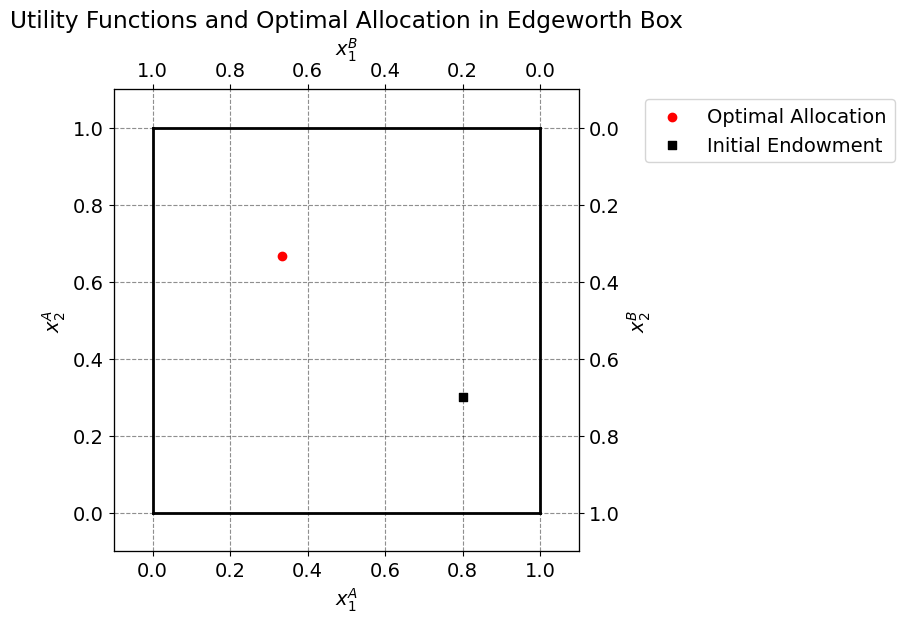

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the Edgeworth box plot
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Define range for x-axis (goods)
x_values = np.linspace(0, 1, 100)

# Calculate utility functions for individual A and B
utility_A_values = economy.utility_A(x_values, 1 - x_values)
utility_B_values = economy.utility_B(1 - x_values, x_values)


# Plot the optimal allocation
optimal_xA1, optimal_xA2 = optimal_allocation
ax_A.scatter(optimal_xA1, optimal_xA2, color='red', label='Optimal Allocation')

# Plot initial endowment
ax_A.scatter(economy.par.w1A, economy.par.w2A, marker='s', color='black', label='Initial Endowment')

# Plot limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

plt.title('Utility Functions and Optimal Allocation in Edgeworth Box')

# Add legend
ax_A.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

plt.show()
